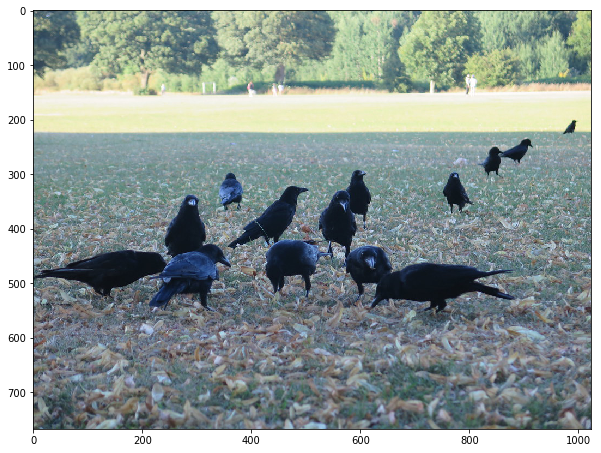

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import numpy as np
import matplotlib.pyplot as plt



plt.figure(figsize=(10,10))
#from scipy import misc

# Read Images 
#img = misc.imread(r'crow2.jpg') 
import imageio
img=imageio.imread("crow2.jpg")
#from PIL import Image
#img = Image.open("crow2.jpg")  
# Output Images 
plt.imshow(img)

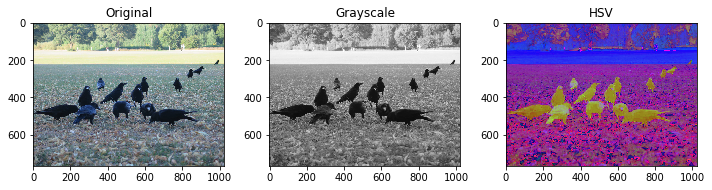

In [5]:
import skimage.color

grayscale = skimage.color.rgb2gray(img)
img_hsv = skimage.color.rgb2hsv(img)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title("Original")

ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

ax[2].imshow(img_hsv,cmap ="hsv")
ax[2].set_title("HSV")

fig.tight_layout()
plt.show()

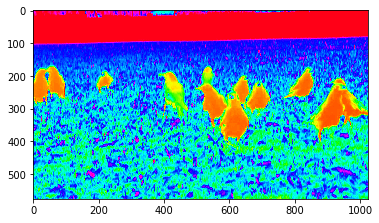

In [20]:
plt.imshow(img_hsv[:,:,2],cmap="hsv")

In [23]:
from scipy.misc import imsave
imsave('v component.jpg', img_hsv)

D:\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


In [18]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt

img = cv2.imread(r'crow.jpg')
hsv =cv2.cvtColor(img,cv2.COLOR_BGR2HSV)



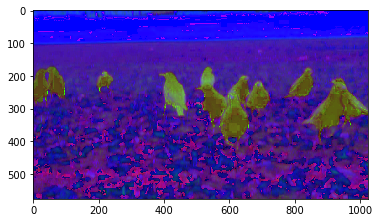

In [19]:
plt.imshow(hsv)

In [4]:
light_orange = (210, 52, 34)
dark_orange = (180, 32, 7)

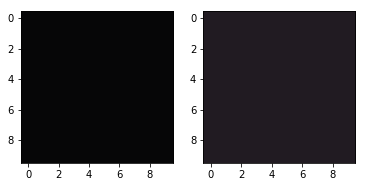

In [5]:
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [12]:
light_orange = (54, 78, 106)
dark_orange = (13, 19, 19)

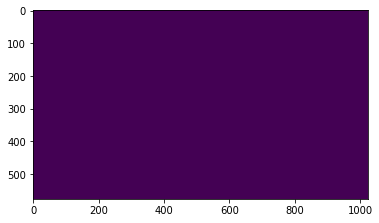

In [17]:
mask = cv2.inRange(hsv, light_orange, dark_orange)
res= cv2.bitwise_and(hsv,hsv,mask=mask)
plt.imshow(mask)

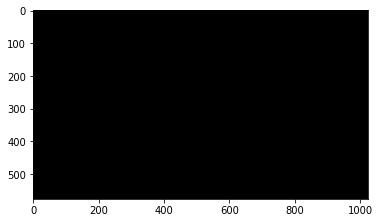

In [18]:
plt.imshow(res)

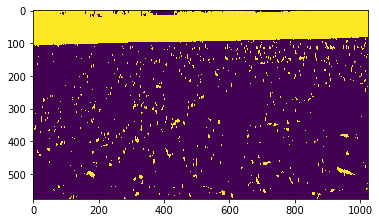

In [33]:

# Python program to transform an image using 
# threshold. 
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 
  
# Image operation using thresholding 
img = cv2.imread(r'crow.jpg')
gray =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  
ret, thresh = cv2.threshold(gray, 0, 15, 
                            cv2.THRESH_BINARY +
                            cv2.THRESH_OTSU) 
plt.imshow(thresh)
plt.show()

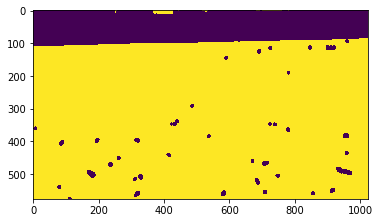

In [3]:
kernel = np.ones((3, 3), np.uint8) 
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, 
                            kernel, iterations = 2) 
  
# Background area using Dialation 
bg = cv2.dilate(closing, kernel, iterations = 1) 
  
# Finding foreground area 
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0) 
ret, fg = cv2.threshold(dist_transform, 0.02
                        * dist_transform.max(), 255, 0) 
  
plt.imshow(fg)
plt.show()

In [149]:

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_gray = np.array([0,0,0], np.uint8)
upper_gray = np.array([50,50,100], np.uint8)

mask_gray = cv2.inRange(img, lower_gray, upper_gray)
img_res = cv2.bitwise_and(img, img, mask = mask_gray)

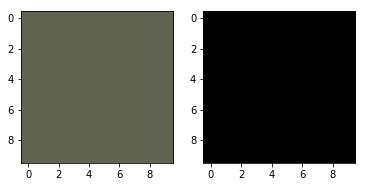

In [150]:
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), lower_gray, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_gray, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

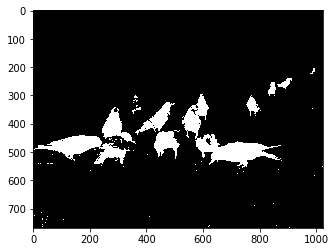

In [167]:
plt.imshow(mask_gray,cmap="gray")

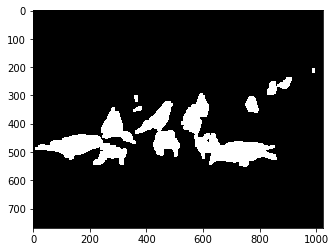

In [168]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(mask_gray,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(sure_bg,cmap="gray")

In [163]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_bg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

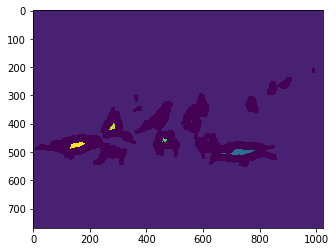

In [164]:
plt.imshow(markers)

In [165]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

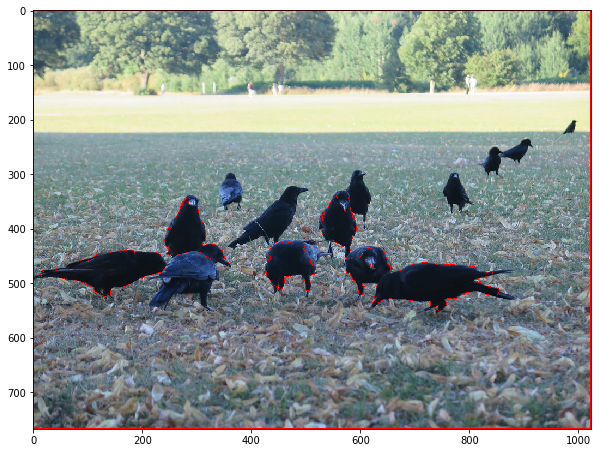

In [166]:
plt.figure(figsize=(10,10))
plt.imshow(img)

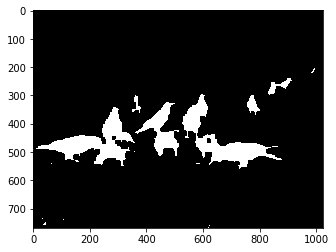

In [198]:
kernel = np.ones((3, 3), np.uint8) 
closing = cv2.morphologyEx(mask_gray, cv2.MORPH_CLOSE, 
                            kernel, iterations = 5) 
  
# Background area using Dialation 
bg = cv2.dilate(closing, kernel, iterations = 2) 
  
# Finding foreground area 
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0) 
ret, fg = cv2.threshold(dist_transform, 0.03* dist_transform.max(), 255, 0) 
  
plt.imshow(fg,cmap="gray")

In [188]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(fg)
unknown = cv2.subtract(bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg,connectivity=4)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

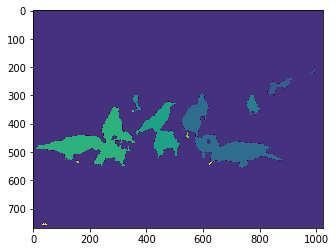

In [201]:

plt.imshow(markers)

In [199]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [252, 240, 3]

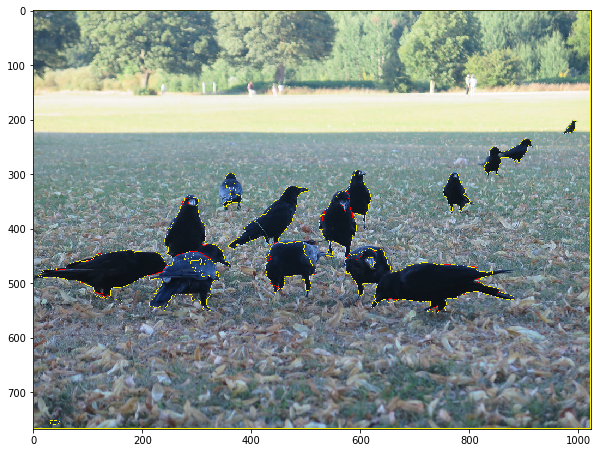

In [200]:
plt.figure(figsize=(10,10))
plt.imshow(img)